In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tree_detection_framework.detection.SAM2_detector import SAMV2Detector
from tree_detection_framework.utils.benchmarking import (
    get_benchmark_detections,
    evaluate_detections,
)

/ofo-share/repos-amritha/conda/envs/sam-tdf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
RGB_DIR = [
    "/ofo-share/repos-amritha/tree-detection-framework/data/dtree2-data/eval_images_flipped/Danum",
    "/ofo-share/repos-amritha/tree-detection-framework/data/dtree2-data/eval_images_flipped/SepilokEast",
    "/ofo-share/repos-amritha/tree-detection-framework/data/dtree2-data/eval_images_flipped/SepilokWest",
]

ANN_DIR = [
    "/ofo-share/repos-amritha/tree-detection-framework/data/dtree2-data/eval_annotations/Danum",
    "/ofo-share/repos-amritha/tree-detection-framework/data/dtree2-data/eval_annotations/SepilokEast",
    "/ofo-share/repos-amritha/tree-detection-framework/data/dtree2-data/eval_annotations/SepilokWest",
]

DATASET_NAME = "detectree2"
NMS_THRESHOLD = 0.05
CONFIDENCE_THRESHOLD = 0.1

detector = SAMV2Detector()

INFO:root:Loaded checkpoint sucessfully


In [ ]:
# Load NEON and get detections
mappings = get_benchmark_detections(
    dataset_name=DATASET_NAME,
    images_dir=RGB_DIR,
    annotations_dir=ANN_DIR,
    detectors={"sam2": detector},
    nms_threshold=NMS_THRESHOLD,
    min_confidence=CONFIDENCE_THRESHOLD,
)

In [5]:
evaluate_detections(mappings)

INFO:root:Detectors to be evaluated: ['sam2']


'sam2': Precision=0.15519227045589495, Recall=0.48047535882138265, F1-Score=0.23460707577127715


Visualizing the predictions
--

In [9]:
def create_plot_with_preds(img, gt_boxes):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    ax.imshow(img)
    for bbox in gt_boxes:
        xmin, ymin, xmax, ymax = bbox.bounds
        # Create a Rectangle patch (xy, width, height)
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle(
            (xmin, ymin), width, height, linewidth=1, edgecolor="b", facecolor="none"
        )
        # Add the patch to the Axes
        ax.add_patch(rect)
    return ax

<Axes: >

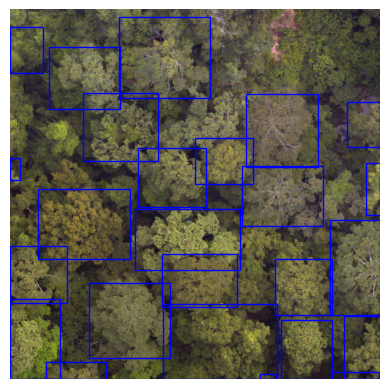

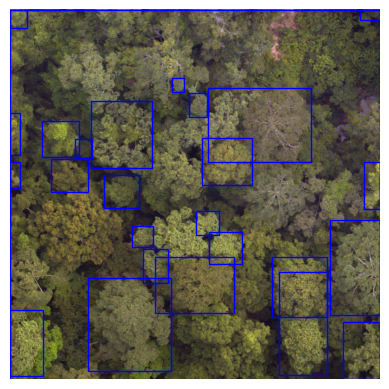

In [10]:
example_img = list(mappings.keys())[13]
img = cv2.imread(example_img, cv2.IMREAD_COLOR_RGB)
create_plot_with_preds(img, mappings[example_img]["gt"])
create_plot_with_preds(img, mappings[example_img]["sam2"])

<Axes: >

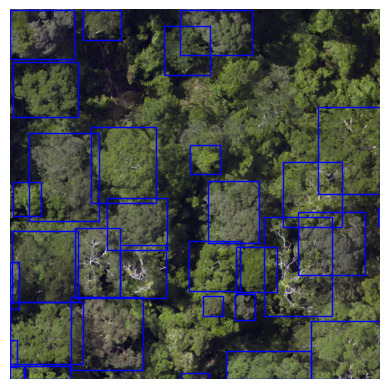

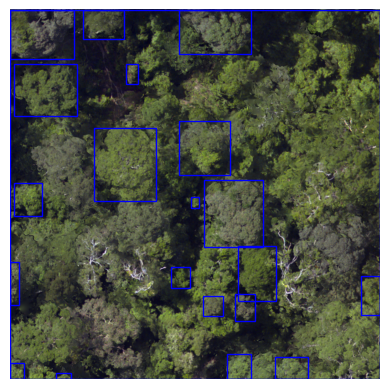

In [11]:
example_img = list(mappings.keys())[7]
img = cv2.imread(example_img, cv2.IMREAD_COLOR_RGB)
create_plot_with_preds(img, mappings[example_img]["gt"])
create_plot_with_preds(img, mappings[example_img]["sam2"])